In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from sonipy import sonify
from sonipy.sonify import SonifyTool

In [2]:
% matplotlib inline

# The basics

First, let's create some x and y data to sonify.

In [3]:
x = np.linspace(0,5,50)
y = np.sin(x**2)

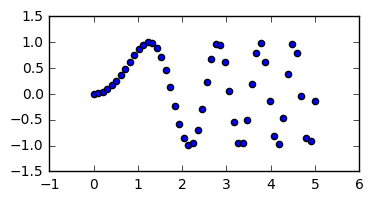

In [4]:
plt.figure(figsize=(4,2))
plt.scatter(x,y);

Here is the simpliest way to sonify an audio file. The tone can then be played in a jupyter notebook.

In [5]:
Tone = SonifyTool(x, y)
Tone.play(autoplay=True)

multitones created


SonifyTool takes a `bliplength` parameter to change the time length of each blip in seconds.

You can also save the tone as follows:

In [6]:
Tone.save(path='.')

Writing ./tones/multitone.wav
Saved multitone as ./tones/multitone.wav.


Saving the tone creates a folder called "tones" in the current directory.

If you want your tones saved elsewhere, change path to your desired directory.

# The adjustments

## duration


There are three inputs that help you change how x scales with time, which `SonifyTool` will take inside a `durations_args` dictionary.

- `time_total` : Total time difference between first and last blip (in ms).
- `dtime_min` : Minimum allowed time difference between blips (in ms).
- `dtime_max` : Maximum allowed time difference between blips (in ms).

In [7]:
# choose 1 of 3
duration_args = {
    "time_total": 1000, # 10 seconds or 10,000 ms
#     "dtime_min": 50, # .2 second or 200 ms
#     "dtime_max": 100, # .1 second or 500 ms
}

Tone = SonifyTool(x,y, duration_args=duration_args)
Tone.play()

multitones created


Alternately, you can simply pass a `duration_scale` (in units of x value per ms).

In [8]:
duration_scale = 1. / 200. # x value / time (ms)

Tone = SonifyTool(x, y, duration_scale=duration_scale)
Tone.play()

multitones created



## frequency

Here's how to change how frequency scales with y. `SonifyTool` will take `frequency_args` with the following options for inputs:

- `frequency_min` : the minimum frequency that the y values hit.
- `frequency_max` : the maximum frequency that the y values hit.
- `cents_per_value` : a y scale parameter, in units of "pitch" per y value (cents/y). 

[Cents](https://en.wikipedia.org/wiki/Cent_(music)) are a logarithmic unit of tone intervals.

In [9]:
C4 = 261.6 # Hz

# choose 2 of 3
frequency_args = {
#     "frequency_min": 2 * C4,
    "frequency_max": 10 * C4,
    "cents_per_value": 1400.,
}

Tone = SonifyTool(x, y, frequency_args=frequency_args)
Tone.play()

multitones created


# The plots

The same information that is contained inside the audio file can be visualized in the following plot formats. The beauty of the soundfile is not having to deal with these, hence why I've left them for last.

As a plot, x and y would look like this.

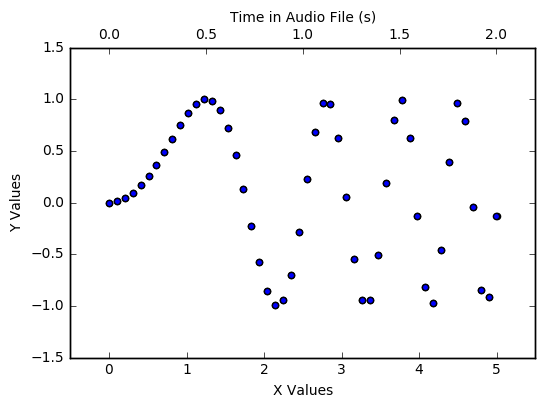

In [10]:
from sonipy.visualisation import plotData
fig, axes = plotData(Tone)

//anaconda/envs/py27/lib/python2.7/site-packages/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


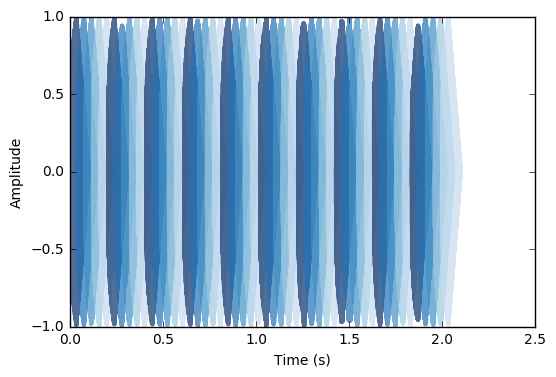

In [11]:
Tone.plotBlips()

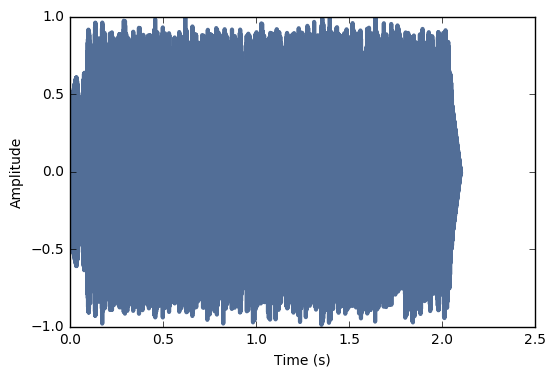

In [12]:
Tone.plotTone()

//anaconda/envs/py27/lib/python2.7/site-packages/thinkdsp.py:897: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ys = self.ys[i:j].copy()
//anaconda/envs/py27/lib/python2.7/site-packages/thinkdsp.py:898: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ts = self.ts[i:j].copy()


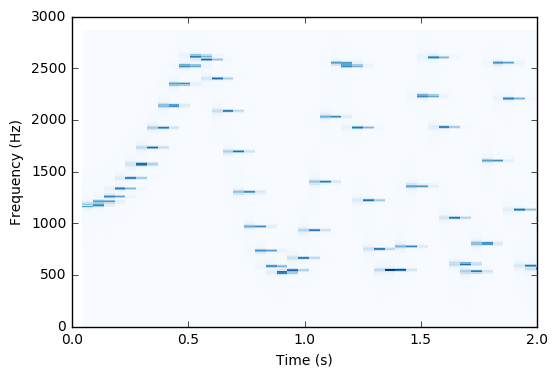

In [13]:
Tone.plotSpectrogram();

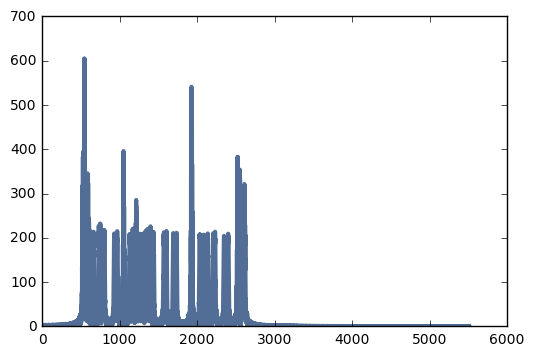

In [14]:
Tone.plotSpectrum()

# For the extra curious

### Hidden information
The details of the sonification can be found inside Tone. These include details like the y frequency scale (cent / y value), the x durations scale (x value / ms), total time (ms), or any of the following:

In [15]:
Tone.keys

['multitone',
 'multitones',
 'x',
 'x_dtime_max',
 'x_dtime_min',
 'x_durations',
 'x_dx',
 'x_dx_max',
 'x_dx_min',
 'x_scale',
 'x_starttimes',
 'x_time_total',
 'y',
 'y_cents_per_value',
 'y_freq_translate_to_range',
 'y_frequencies',
 'y_frequency_max',
 'y_frequency_min',
 'y_input_frequency_args',
 'y_inputs',
 'y_n_inputs',
 'y_value_max',
 'y_value_min',
 'y_values']

### Can I play with the actual soundfile?

If you'd like to mess with the soundfile once created, you should play with `Tone.multitone`, which is an instance of `thinkdsp.Wave`. For all the details on how to use it, see [ThinkDSP](https://github.com/AllenDowney/ThinkDSP/tree/9ae1b562742358e25a82b5f3e870f614faf001a1).

For the extra curious, each individual tone is placed within `Tone.multitones`.

In [16]:
Tone.multitone

<thinkdsp.Wave instance at 0x116f92638>

### A note on comparing data
##### Would you like your pitch to scale the same way across plots/tones? 

If you'd like to compare multiple soundfiles consistently, I'd recommend passing the same `cents_per_value` for each soundfile. You will also pass a `frequency_min` or `frequency_max`. If you'd like the maximum frequencies or minimum frequencies to match to values that aren't the maximum or minimum in your input data, you may pass a `value_min` or `value_max` to force the corresponding minimum/maximum frequency to the same y value, grounding the scale across differnt Tones.

To save you the calculation, you can find a cent_per_value function inside `sonipy.scales.frequency`.

Here's some basic code to do just that.

In [17]:
C4 = 261.6 # Hz
frequency_min = 2 * C4
frequency_max = 10 * C4
value_min = min(y)
value_max = max(y)

In [18]:
from sonipy.scales.frequency import cent_per_value
myscale = cent_per_value(f_min = frequency_min, f_max = frequency_max,
                         v_min = value_min, v_max = value_max)

In [19]:
frequency_args = {
    "frequency_min": frequency_min,
    "cents_per_value" : myscale/2,
    "value_min" : min(y),
}

Tone = SonifyTool(x,y, frequency_args=frequency_args)
Tone.play()

multitones created


# Want to contribute? Have feedback?

Feel free to open an issue/pull request here on github, or email locke.patton@cfa.harvard.edu. I can't promise not to be busy, but I'm excited for feedback!